# 릿지 회귀

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
from sklearn.model_selection import train_test_split

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [5]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score # 교차 검증

lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
mse_scores = -1*neg_mse_scores
rmse_scores = np.sqrt(mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 negative MSE scores : ", np.round(neg_mse_scores, 2))
print("5 folds의 개별 RMSE scores : ", np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE : ", np.round(avg_rmse, 2))

5 folds의 개별 negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE :  5.83


In [6]:
# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
mse_scores = -1*neg_mse_scores
rmse_scores = np.sqrt(mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 negative MSE scores : ", np.round(neg_mse_scores, 2))
print("5 folds의 개별 RMSE scores : ", np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE : ", np.round(avg_rmse, 2))

5 folds의 개별 negative MSE scores :  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds의 개별 RMSE scores :  [3.38 4.93 5.31 8.64 5.34]
5 folds의 평균 RMSE :  5.52


In [7]:
# 릿지에 사용될 alpha 파라미터 값 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 RMSE를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print("alpha {0}일 때 5 folds의 평균 RMSE : {1:.2f}".format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 5.83
alpha 0.1일 때 5 folds의 평균 RMSE : 5.79
alpha 1일 때 5 folds의 평균 RMSE : 5.65
alpha 10일 때 5 folds의 평균 RMSE : 5.52
alpha 100일 때 5 folds의 평균 RMSE : 5.33


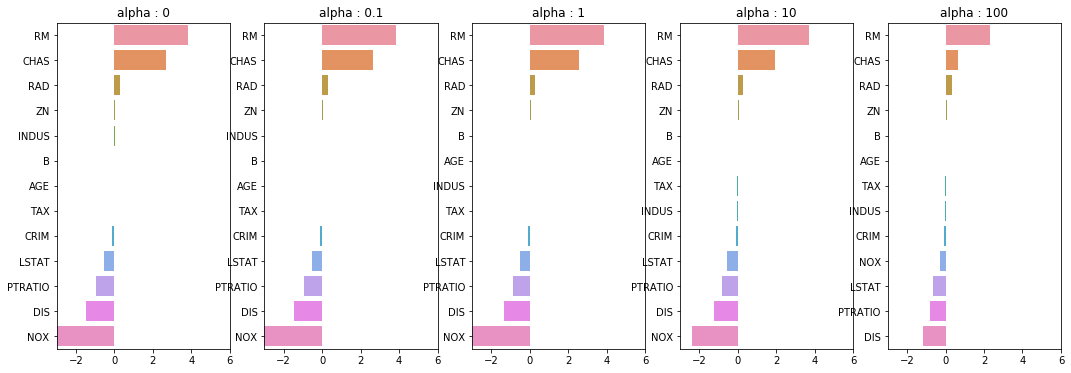

In [8]:
# 각 alpha에 따른 회귀 계수 값 저장, 시각화
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

# pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # 회귀 계수 Series로 변환, 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [9]:
alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha : ' + str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha : 0,alpha : 0.1,alpha : 1,alpha : 10,alpha : 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


# 라쏘 회귀

In [10]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 평균 RMSE 출력, 회귀 계수 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print("=====", model_name, "=====")
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)   
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print("alpha {0}일 때 5 folds의 평균 RMSE : {1:.2f}".format(param, avg_rmse))
        # 회귀 계수 추출
        model.fit(X_data, y_target)
        # 회귀 계수 Series로 변환, 이를 DataFrame의 칼럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha : ' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

===== Lasso =====
alpha 0.07일 때 5 folds의 평균 RMSE : 5.61
alpha 0.1일 때 5 folds의 평균 RMSE : 5.62
alpha 0.5일 때 5 folds의 평균 RMSE : 5.67
alpha 1일 때 5 folds의 평균 RMSE : 5.78
alpha 3일 때 5 folds의 평균 RMSE : 6.19


In [13]:
sort_column = 'alpha : ' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


# 엘라스틱넷 회귀

In [14]:
elastic_alphas = [0, 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

===== ElasticNet =====
alpha 0일 때 5 folds의 평균 RMSE : 5.83
alpha 0.07일 때 5 folds의 평균 RMSE : 5.54
alpha 0.1일 때 5 folds의 평균 RMSE : 5.53
alpha 0.5일 때 5 folds의 평균 RMSE : 5.47
alpha 1일 때 5 folds의 평균 RMSE : 5.60
alpha 3일 때 5 folds의 평균 RMSE : 6.07


In [15]:
sort_column = 'alpha : ' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha : 0,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.809865,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,2.686734,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.306049,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.046420,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,0.020559,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
B,0.009312,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,0.000692,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.012335,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
CRIM,-0.108011,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
LSTAT,-0.524758,-0.574822,-0.587702,-0.693861,-0.760457,-0.800368


# 선형 회귀 모델을 위한 데이터 변환

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method : 표준 정규분포 변환, 최댓값/최솟값 정규화, 로그 변환 결정
# p_degree : 다항식 특성을 추가할 때 적용
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [22]:
# alpha 값을 다르게 적용
alphas = [0.1, 1, 10, 100]
# 원본 + 5개 방식으로 데이터 변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print("변환 유형 : {0}, Polynomial Degree : {1}".format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)
    print("--------------------------------------------------")

변환 유형 : None, Polynomial Degree : None
alpha 0.1일 때 5 folds의 평균 RMSE : 5.79
alpha 1일 때 5 folds의 평균 RMSE : 5.65
alpha 10일 때 5 folds의 평균 RMSE : 5.52
alpha 100일 때 5 folds의 평균 RMSE : 5.33
--------------------------------------------------
변환 유형 : Standard, Polynomial Degree : None
alpha 0.1일 때 5 folds의 평균 RMSE : 5.83
alpha 1일 때 5 folds의 평균 RMSE : 5.80
alpha 10일 때 5 folds의 평균 RMSE : 5.64
alpha 100일 때 5 folds의 평균 RMSE : 5.42
--------------------------------------------------
변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1일 때 5 folds의 평균 RMSE : 8.83
alpha 1일 때 5 folds의 평균 RMSE : 6.87
alpha 10일 때 5 folds의 평균 RMSE : 5.48
alpha 100일 때 5 folds의 평균 RMSE : 4.63
--------------------------------------------------
변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1일 때 5 folds의 평균 RMSE : 5.76
alpha 1일 때 5 folds의 평균 RMSE : 5.47
alpha 10일 때 5 folds의 평균 RMSE : 5.75
alpha 100일 때 5 folds의 평균 RMSE : 7.63
--------------------------------------------------
변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일 때 5 